In [8]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.27.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
opt/ibm/custom-channels/meta-wscloud/linux-64      129.0 B @ 614.3kB/s  0

In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
GameStop = yf.Ticker("GME")

In [13]:
gme_data=GameStop.history(period="max")

In [14]:
GameStop_info=GameStop.info
GameStop_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 12000,
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, 

In [15]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
gme_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

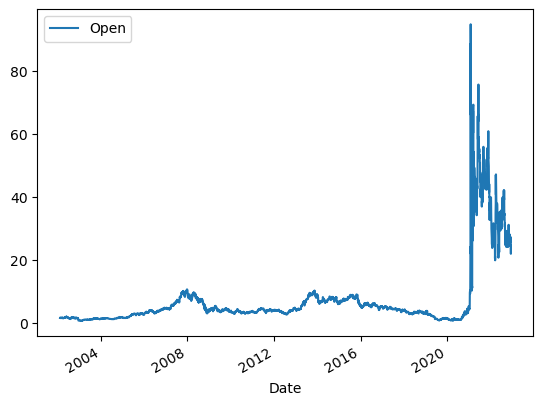

In [18]:
gme_data.plot(x="Date", y="Open")

In [19]:
gme_data.reset_index(inplace=True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [21]:
html_data=requests.get(url).text

In [22]:
soup = BeautifulSoup(html_data,"html5lib")

In [23]:
gme_revenue= pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue=gme_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")

/tmp/wsuser/ipykernel_871/955646331.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")


In [24]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
50,2010-01-31,3524
51,2009-10-31,1835
52,2009-07-31,1739
53,2009-04-30,1981
54,2009-01-31,3492
